In [1]:
import pandas as pd
import torch
from torch_geometric.data import DataLoader
from torch import nn
from smallDatasetGenerator import *
from GNNTE import *

/home/francesco.pugnaloni/anaconda3/envs/HPIPyG/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [28]:
data = load_test_training_stuff("/dati/home/francesco.pugnaloni/wikipedia_tables/small_dataset_debug/")

In [29]:
data.keys()

dict_keys(['tables', 'graphs', 'triples'])

In [30]:
data['graphs']['0'].edges.shape

torch.Size([2, 8])

In [31]:
data['triples'].shape

(100, 3)

In [32]:
gtd = GraphTriplesDataset(data['triples'], data['graphs'])

In [33]:
d = gtd[0]

In [34]:
gtd[2][0]['edge_index']

tensor([[ 7,  3,  7,  0,  8,  3,  8,  1,  9,  3,  9,  2, 10,  4, 10,  0, 11,  4,
         11,  1, 12,  4, 12,  2,  8,  5,  8,  0, 13,  5, 13,  1, 10,  5, 10,  2,
         14,  6, 14,  0, 15,  6, 15,  1, 16,  6, 16,  2],
        [ 3,  7,  0,  7,  3,  8,  1,  8,  3,  9,  2,  9,  4, 10,  0, 10,  4, 11,
          1, 11,  4, 12,  2, 12,  5,  8,  0,  8,  5, 13,  1, 13,  5, 10,  2, 10,
          6, 14,  0, 14,  6, 15,  1, 15,  6, 16,  2, 16]], device='cuda:0')

In [35]:
train_dataloader = DataLoader(gtd, batch_size=25, shuffle=True)

In [36]:
l = []
for i in train_dataloader:
    l.append(i)

In [37]:
l[0][0]['edge_index'].to('cuda')

tensor([[  7,   3,   7,  ..., 620, 636, 616],
        [  3,   7,   0,  ..., 636, 616, 636]], device='cuda:0')

In [38]:
type(list(data['graphs'].keys())[0])

str

In [39]:
for batch in train_dataloader:
    print(batch)

[DataBatch(x=[584, 300], edge_index=[2, 2848], batch=[584], ptr=[26]), DataBatch(x=[560, 300], edge_index=[2, 2644], batch=[560], ptr=[26]), tensor([0.4422, 0.3953, 0.4357, 0.0077, 0.7624, 0.8733, 0.7745, 0.4941, 0.4377,
        0.7602, 0.1292, 0.6353, 0.0391, 0.3701, 0.7095, 0.1510, 0.1035, 0.7768,
        0.0290, 0.0850, 0.7549, 0.1310, 0.1681, 0.7088, 0.0742])]
[DataBatch(x=[663, 300], edge_index=[2, 3548], batch=[663], ptr=[26]), DataBatch(x=[658, 300], edge_index=[2, 3552], batch=[658], ptr=[26]), tensor([0.0767, 0.5914, 0.4497, 0.5803, 0.0376, 0.4863, 0.7274, 0.6427, 0.0061,
        0.3346, 0.2363, 0.6764, 0.4420, 0.5077, 0.1152, 0.4198, 0.6740, 0.6621,
        0.6671, 0.1549, 0.1771, 0.4299, 0.9512, 0.3395, 0.8320])]
[DataBatch(x=[626, 300], edge_index=[2, 3164], batch=[626], ptr=[26]), DataBatch(x=[604, 300], edge_index=[2, 3280], batch=[604], ptr=[26]), tensor([0.1140, 0.6785, 0.1973, 0.0786, 0.9124, 0.3368, 0.1622, 0.7461, 0.9242,
        0.8290, 0.7410, 0.6247, 0.2520, 0.670

In [40]:
batch = l[0]

In [41]:
model = GIN(-1,300,3).to('cuda')

In [42]:
gtd.graphs['0'].X

tensor([[-0.0703,  0.0888,  0.0126,  ..., -0.1402,  0.0226,  0.0484],
        [-0.0907,  0.1135,  0.0150,  ..., -0.1588,  0.0267,  0.0645],
        [-0.0498,  0.0641,  0.0102,  ..., -0.1216,  0.0185,  0.0324],
        [-0.0907,  0.1135,  0.0150,  ..., -0.1588,  0.0267,  0.0645],
        [-0.0498,  0.0641,  0.0102,  ..., -0.1216,  0.0185,  0.0324]])

In [43]:
gtd.graphs['0'].edges

tensor([[3, 1, 3, 0, 4, 2, 4, 0],
        [1, 3, 0, 3, 2, 4, 0, 4]], device='cuda:0')

In [44]:
model(gtd.graphs['0'].X.to('cuda'),gtd.graphs['0'].edges.to('cuda')).shape

torch.Size([5, 300])

In [45]:
batch = l[0]

In [46]:
type(batch)

list

In [49]:
batch[2].shape

torch.Size([25])

In [47]:
gbatch = batch[0]

In [143]:
type(gbatch)

torch_geometric.data.batch.DataBatch

In [144]:
gbatch[1]

Data(x=[31, 300], edge_index=[2, 192])

In [145]:
gbatch.num_graphs

25

In [146]:
intervals = [0]+[gbatch[i]['x'].shape[0] for i in range(len(gbatch))]

In [147]:

from tqdm import tqdm
li = list(range(10000000))
l = [0]
for t in li:
    l.append(l[-1]+t)

In [148]:
gbatch

DataBatch(x=[577, 300], edge_index=[2, 3092], batch=[577], ptr=[26])

In [149]:
gbatch[0]['x'].shape[0]

11

In [150]:
out = model(gbatch['x'].to('cuda'), gbatch['edge_index'].to('cuda'))

In [151]:
out[0].shape

torch.Size([300])

In [152]:
tensor = torch.tensor([[1.0, 2.0, 3.0],
                       [4.0, 5.0, 6.0]])

In [153]:
tensor.shape

torch.Size([2, 3])

In [154]:
torch.mean(tensor, dim=0).shape

torch.Size([3])

In [155]:
import torch

# Example tensors
tensor1 = torch.tensor([1, 2, 3])
tensor2 = torch.tensor([4, 5, 6])

# Concatenate along dimension 0
concatenated_tensor = torch.cat((tensor1.unsqueeze(dim=0), tensor2.unsqueeze(dim=0)), dim=0)

print(concatenated_tensor)

tensor([[1, 2, 3],
        [4, 5, 6]])


In [156]:
my_model = GNNTE(100,3)

In [157]:
out = model(gbatch['x'].to('cuda'), gbatch['edge_index'].to('cuda'))

In [158]:
gbatch['x'].to('cuda')

tensor([[-0.0349, -0.0655,  0.0415,  ...,  0.0701, -0.0300,  0.0642],
        [-0.0829,  0.1732, -0.0271,  ..., -0.2305,  0.0243,  0.0664],
        [ 0.0295, -0.0276, -0.0211,  ...,  0.0401, -0.0036,  0.0136],
        ...,
        [-0.0823,  0.2050, -0.0476,  ..., -0.2261,  0.0221,  0.0751],
        [-0.0267, -0.0463,  0.0250,  ..., -0.0153,  0.0012, -0.0230],
        [-0.0016, -0.0375,  0.0227,  ...,  0.0200,  0.0058, -0.0349]],
       device='cuda:0')

In [159]:
gbatch['edge_index'].to('cuda')

tensor([[  5,   3,   5,  ..., 571, 576, 568],
        [  3,   5,   0,  ..., 576, 568, 576]], device='cuda:0')

In [160]:
out[23]

tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, n

In [161]:
data = load_test_training_stuff("/dati/home/francesco.pugnaloni/wikipedia_tables/small_dataset_debug/triples.csv","/dati/home/francesco.pugnaloni/wikipedia_tables/small_dataset_debug/graphs.pkl")
gtd = GraphTriplesDataset(data['triples'], data['graphs'])
train_dataloader = DataLoader(gtd, batch_size=25, shuffle=True)
l = []
for i in train_dataloader:
    l.append(i)
batch = l[0]
gbatch = batch[0].to('cuda')
my_model = GNNTE(5,3)
out = my_model(gbatch)
print('ok')

ok


/home/francesco.pugnaloni/anaconda3/envs/HPIPyG/lib/python3.11/site-packages/torch_geometric/deprecation.py:22: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)


In [164]:
gbatch

DataBatch(x=[684, 300], edge_index=[2, 3684], batch=[684], ptr=[26])

In [165]:
torch.nan

nan

In [167]:
torch.sum(torch.isnan(out))

tensor(90, device='cuda:0')

In [168]:
len(data['graphs'])

50

In [12]:
tot = 0
l = []
for i in range(50):
    tot += torch.sum(torch.isnan(data['graphs'][str(i)].X))
    if torch.sum(torch.isnan(data['graphs'][str(i)].X)) != 0:
        l.append(i)

In [11]:
tot

tensor(18000)

In [ ]:
l

In [171]:
torch.sum(torch.isnan(data['graphs'][str(1)].X[12:18]))

tensor(300)

In [172]:
data['graphs'][str(1)].X[12:18]

tensor([[-0.0267, -0.0463,  0.0250,  ..., -0.0153,  0.0012, -0.0230],
        [ 0.0342, -0.0144,  0.0316,  ...,  0.0586, -0.0051,  0.0112],
        [    nan,     nan,     nan,  ...,     nan,     nan,     nan],
        [-0.0639,  0.0235, -0.0104,  ...,  0.0544, -0.0450,  0.0753],
        [-0.1147,  0.0994,  0.0433,  ..., -0.1951,  0.0449,  0.0041],
        [-0.0735,  0.0810,  0.0016,  ..., -0.0184,  0.0524, -0.0111]])

In [175]:
data['graphs'].X[13]

tensor([ 3.4220e-02, -1.4418e-02,  3.1561e-02,  2.7710e-03, -1.2453e-04,
         2.5195e-02, -1.9256e-02, -6.1987e-02,  3.6241e-02, -1.3131e-02,
         8.0752e-02,  6.5243e-04,  2.8308e-02,  5.7992e-04, -6.9884e-02,
        -7.7855e-02,  6.1163e-02, -1.3620e-01,  1.8274e-02, -4.5137e-02,
         3.3244e-02, -9.4968e-02,  3.6478e-02,  1.8895e-02,  6.0276e-02,
         8.6723e-02, -3.7946e-03,  2.3424e-02,  2.4898e-02,  3.9104e-02,
         2.9422e-02, -2.2442e-02,  4.8203e-02,  7.2193e-02, -2.5699e-03,
        -3.6526e-02,  1.7312e-02, -1.4082e-02, -2.9193e-03,  3.6887e-02,
         1.6916e-02, -1.1618e-01,  3.5573e-02, -8.4303e-02,  2.5318e-02,
         3.3375e-02,  3.2912e-02, -6.4352e-02,  5.4359e-02,  4.5138e-02,
         3.7985e-02,  8.0404e-02, -2.9606e-02, -7.6558e-02, -7.3798e-03,
         2.7716e-02,  8.7097e-02,  2.8702e-02, -5.6983e-02,  1.3051e-01,
         6.7886e-02, -4.6071e-02,  3.1253e-02,  6.1368e-04,  6.6252e-02,
         3.2440e-02, -1.8302e-02, -3.7581e-03, -1.1

In [177]:
for g in data['graphs'].values():
    if g == None:
        print('lui')

In [4]:
t1 =[
    ["ciao sono mario", '7',7],
    ["ferrovia",pd.NA,"12"]
    ]

In [5]:
df = pd.DataFrame(t1)

In [6]:
df

0     1   2
0  ciao sono mario     7   7
1         ferrovia  <NA>  12

In [8]:
df.to_csv("/home/francesco.pugnaloni/tmp/test_table.csv", index=False)

In [2]:
from smallDatasetGenerator import *

In [4]:
generate_test_training_stuff(50, 100, "/home/francesco.pugnaloni/tmp/small_tables",3,3)

Loading fasttext model, it will take 2/3 minutes


[nltk_data] Downloading package stopwords to
[nltk_data]     /home/francesco.pugnaloni/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Model loaded
Graphs generation starts


100%|██████████| 50/50 [00:01<00:00, 38.63it/s]

Graph generation ends
Saving output
Output saved


In [3]:
data = load_test_training_stuff("/home/francesco.pugnaloni/tmp/small_tables")

In [6]:
data

{'tables': {'0':                            0
  0  I have a pen and an apple
  1                          3
  2                          2,
  '1':      0
  0  dog,
  '2':                                            0   
  0  The plot of the book is that it is a book  \
  1                                          8   
  2                                        cat   
  
                                                     1   
  0                                                cat  \
  1  this sentence will be pretty long and hopefull...   
  2                                                  1   
  
                             2  
  0                    Leopard  
  1  I have a pen and an apple  
  2                          2  ,
  '3':                                                    0   
  0                          I have a pen and an apple  \
  1  this sentence will be pretty long and hopefull...   
  2                                                  2   
  
                    

In [4]:
tot = 0
l = []
for i in range(50):
    tot += torch.sum(torch.isnan(data['graphs'][str(i)].X))
    if torch.sum(torch.isnan(data['graphs'][str(i)].X)) != 0:
        l.append(i)

In [5]:
tot

tensor(1800)

In [6]:
l

[22, 25, 29, 34, 37, 43]

In [7]:
data['tables']['22']

0   
0          The plot of the book is that it is a book  \
1  this sentence will be pretty long and hopefull...   
2  this sentence will be pretty long and hopefull...   

                                           1  
0                  I have a pen and an apple  
1                                        dog  
2  The plot of the book is that it is a book

In [11]:
t = data['tables']['25']

In [10]:
t['2'] = [pd.NA, 15, pd.NA]

In [14]:
t

0     2
0  this sentence will be pretty long and hopefull...  <NA>
1                                                  4    15
2  this sentence will be pretty long and hopefull...  <NA>

In [15]:
data['graphs']['25'].X

tensor([[-0.0572,  0.0316,  0.0197,  ..., -0.1033,  0.0134,  0.0009],
        [ 0.0004, -0.0362, -0.0040,  ..., -0.0115, -0.0181, -0.0023],
        [-0.1147,  0.0994,  0.0433,  ..., -0.1951,  0.0449,  0.0041],
        [    nan,     nan,     nan,  ...,     nan,     nan,     nan],
        [ 0.0004, -0.0362, -0.0040,  ..., -0.0115, -0.0181, -0.0023],
        [-0.1147,  0.0994,  0.0433,  ..., -0.1951,  0.0449,  0.0041]])

In [16]:
torch.sum(torch.isnan(data['graphs']['25'].X))

tensor(300)

In [16]:
tmp = torch.Tensor([
    [1,2,3],
    [2,5,1],
    [1,6,9],
    [3,6,9]
])

In [17]:
tmp

tensor([[1., 2., 3.],
        [2., 5., 1.],
        [1., 6., 9.],
        [3., 6., 9.]])

In [18]:
l = [1,2,1]
tmp[l]

tensor([[2., 5., 1.],
        [1., 6., 9.],
        [2., 5., 1.]])

In [22]:
tmp1 = torch.Tensor([
    [1,2,3],
    [2,5,1],
    [1,6,9],
    [3,6,9]
])

tmp2 = torch.Tensor([
    [1,2,3],
    [2,6,1],
    [2,1,5],
    [3,6,9]
])

In [23]:
import torch.nn.functional as F

In [24]:
F.cosine_similarity(tmp1, tmp2, dim=1)

tensor([1.0000, 0.9980, 0.8908, 1.0000])

In [1]:
import pandas as pd
from trainingTriplesPreprocessing import *

In [2]:
df = pd.read_csv("/dati/home/francesco.pugnaloni/wikipedia_tables/processed_tables/test_samples_no_small_tables.csv")

In [3]:
df.shape

(1486091, 3)

100%|██████████| 1486091/1486091 [00:00<00:00, 2191849.28it/s]


{0.8: 179114,
 0.3: 170101,
 0.4: 119736,
 0.9: 142098,
 0.5: 89382,
 0.7: 100776,
 0.6: 70789,
 0.0: 172623,
 0.2: 168583,
 0.1: 272889}

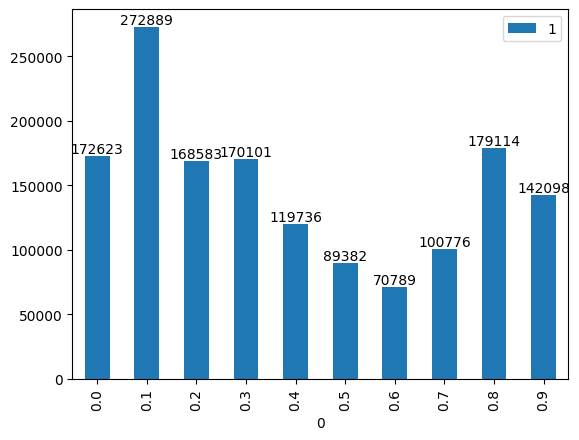

In [4]:
show_samples_distribution(df)

In [2]:
df = generate_small_triple_dataset(100)

In [3]:
df.shape

(100, 3)

In [4]:
df

r_id       s_id  table_overlap
0   475.624970  475.62498       0.853659
1   492.106062  497.41440       0.571429
2   387.152780  489.23273       0.476190
3   205.768010  492.11052       0.290909
4   182.161740  239.94505       0.111111
..         ...        ...            ...
95  579.589090  579.58924       0.846154
96  409.136973  448.68844       0.166667
97  159.102112  218.83592       0.197802
98  566.149830  566.14997       0.975610
99  242.196830  246.22275       0.111111

[100 rows x 3 columns]

In [1]:
import pandas as pd

In [2]:
df_no_small = pd.read_csv("/dati/home/francesco.pugnaloni/wikipedia_tables/processed_tables/test_samples_no_small_tables.csv")

In [3]:
df_no_small.shape

(1486091, 3)

In [2]:
df_train = pd.read_csv("/dati/home/francesco.pugnaloni/wikipedia_tables/training_data/millions_of_tables/samples.csv")

In [5]:
df_train.shape

(1486091, 3)

In [3]:
from trainingTriplesPreprocessing import show_samples_distribution

100%|██████████| 1486091/1486091 [00:00<00:00, 2090741.58it/s]


{0.8: 179114,
 0.3: 170101,
 0.4: 119736,
 0.9: 142098,
 0.5: 89382,
 0.7: 100776,
 0.6: 70789,
 0.0: 172623,
 0.2: 168583,
 0.1: 272889}

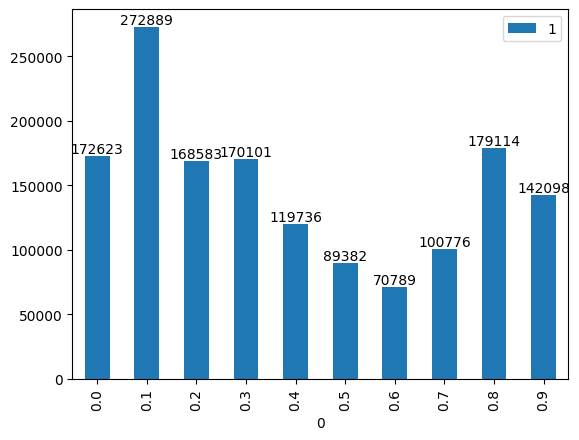

In [7]:
show_samples_distribution(df_train)

100%|██████████| 1486091/1486091 [00:00<00:00, 2014610.23it/s]


{9.0: 70174,
 3.3: 47263,
 8.5: 22341,
 4.0: 10518,
 3.5: 7258,
 8.8: 10003,
 4.1: 4258,
 4.9: 11255,
 9.3: 12755,
 8.3: 39452,
 5.9: 33129,
 8.0: 35289,
 7.3: 5255,
 6.6: 20023,
 6.2: 5089,
 9.9: 1645,
 9.1: 11766,
 8.7: 10894,
 0.8: 21648,
 7.4: 30773,
 9.2: 17195,
 4.7: 60070,
 6.9: 9369,
 6.5: 3997,
 8.1: 12631,
 4.4: 3847,
 2.9: 13164,
 5.3: 4765,
 2.0: 30066,
 1.7: 15963,
 4.5: 4960,
 3.7: 5255,
 9.4: 15606,
 5.5: 4312,
 9.5: 12873,
 5.0: 1801,
 5.4: 4708,
 2.6: 11916,
 1.0: 58904,
 3.1: 8224,
 6.4: 4898,
 2.7: 12891,
 2.4: 27908,
 9.7: 8051,
 7.1: 20490,
 3.0: 15717,
 9.6: 12139,
 8.9: 3793,
 4.3: 3506,
 4.8: 6201,
 0.7: 26293,
 1.9: 15007,
 7.2: 7834,
 5.6: 3455,
 5.1: 3799,
 5.2: 3522,
 4.2: 8773,
 3.8: 56141,
 3.9: 2526,
 6.8: 6496,
 3.6: 8626,
 4.6: 6348,
 2.8: 10331,
 8.6: 5936,
 6.3: 4450,
 2.3: 19000,
 2.2: 21678,
 7.8: 5317,
 7.7: 5347,
 1.4: 18649,
 5.7: 26023,
 1.6: 23570,
 1.8: 22658,
 6.1: 6583,
 3.2: 14361,
 7.6: 8506,
 9.8: 4825,
 6.7: 3143,
 7.0: 5826,
 5.8: 3868,

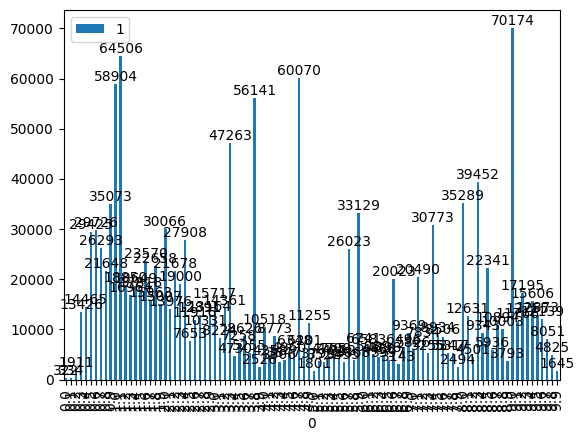

In [4]:
show_samples_distribution(df_train, granularity=0.01)

# NEW

In [1]:
import pickle

In [2]:
with open('/home/francesco.pugnaloni/GNNTE/wikipedia_datasets/1kR/graphs.pkl', 'rb') as f:
    gd = pickle.load(f)

/home/francesco.pugnaloni/miniconda3/envs/GNNTE/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
len(gd)

10000

In [4]:
g = gd['29']

In [5]:
g.X.shape

torch.Size([20, 768])

In [2]:
import tqdm
import pickle

with open('/home/francesco.pugnaloni/GNNTE/wikipedia_datasets/1MR/full_table_dict_with_id.pkl', 'rb') as f:
    gd = pickle.load(f)

i = 0
out = {}
for k in tqdm.tqdm(gd.keys()):
    out[k] = gd[k]
    i+=1
    if i == 10000:
        break
len(out)
out.keys()
type(out['0.41'])

  2%|▏         | 9999/518183 [00:00<00:00, 1416709.31it/s]


pandas.core.frame.DataFrame

In [3]:
with open("/home/francesco.pugnaloni/GNNTE/wikipedia_datasets/1kR.pkl", 'wb') as f:
    pickle.dump(out, f)  

In [4]:
with open("/home/francesco.pugnaloni/GNNTE/wikipedia_datasets/1kR.pkl", 'rb') as f:
    gd = pickle.load(f)

In [5]:
import tqdm
def group_samples(samples_path: str) -> dict:
    samples = pd.read_csv(samples_path)
    d = {}
    for i in tqdm.tqdm(range(samples.shape[0])):
        t1 = samples.iloc[i][0]
        t2 = samples.iloc[i][1]
        try:
            d[t1].append(i)
        except:
            d[t1] = []
            d[t1].append(i)
        try:
            d[t2].append(i)
        except:
            d[t2] = []
            d[t2].append(i)
    return d

In [40]:
g = group_samples("/home/francesco.pugnaloni/GNNTE/Datasets/CoreEvaluationDatasets/1M_wikitables_disjointed/all_samples.csv")

  0%|          | 0/1287374 [00:00<?, ?it/s]/tmp/ipykernel_764079/2196593156.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  t1 = samples.iloc[i][0]
/tmp/ipykernel_764079/2196593156.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  t2 = samples.iloc[i][1]
100%|██████████| 1287374/1287374 [01:27<00:00, 14671.88it/s]


In [41]:
with open('/home/francesco.pugnaloni/GNNTE/Datasets/wikipedia_datasets/1MR/full_table_dict_with_id.pkl', 'rb') as f:
    dddd = pickle.load(f)

In [44]:
len(dddd.keys())

518183

In [42]:
len(g.keys())

418253

In [46]:
new_tab_dict = {}
for k in g.keys():
    new_tab_dict[str(k)] = dddd[str(k)]

In [51]:
type(new_tab_dict['117.5213'])

pandas.core.frame.DataFrame

In [52]:
with open('/home/francesco.pugnaloni/GNNTE/Datasets/CoreEvaluationDatasets/1M_wikitables_disjointed/table_dict_full.pkl','wb') as f:
    pickle.dump(new_tab_dict, f)

In [37]:
len(g)

418253

In [38]:
g_count = {k:len(g[k]) for k in g.keys()}

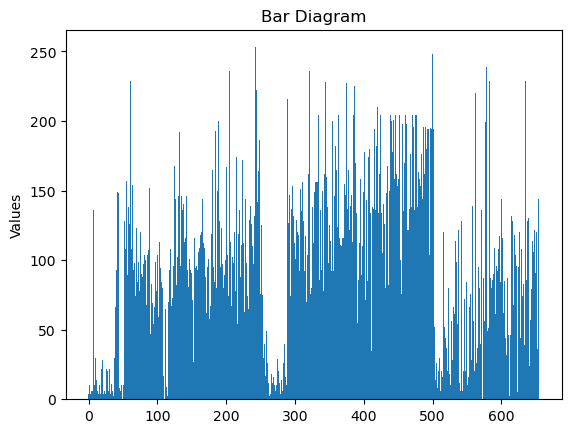

In [39]:
import matplotlib.pyplot as plt

# Sample dictionary with integers
data = {'A': 10, 'B': 25, 'C': 15, 'D': 30}

# Extract keys and values
keys = list(data.keys())
values = list(data.values())

# Plotting the bar diagram
plt.bar(g_count.keys(), g_count.values())

# Adding labels and title
plt.xlabel('')
plt.ylabel('Values')
plt.title('Bar Diagram')

# Display the plot
plt.show()

In [20]:
long = {}
for k in g_count.keys():
    if g_count[k] >300:
        long[k] = g_count[k]

In [26]:
len(long)

651

In [15]:
len(long.keys())

651

In [27]:
tuples_to_drop = []
for k in long.keys():
    tuples_to_drop += g[k]
print(len(tuples_to_drop))

397029


In [28]:
len(tuples_to_drop)

397029

In [30]:
tuples_to_drop = set(tuples_to_drop)

In [32]:
samples_filtered = samples.drop(tuples_to_drop)

In [33]:
samples.shape

(1486091, 3)

In [34]:
samples_filtered.shape

(1287374, 3)

In [35]:
samples_filtered.to_csv('/home/francesco.pugnaloni/GNNTE/Datasets/CoreEvaluationDatasets/1M_wikitables_disjointed/all_samples.csv', index=False)

In [7]:
import pickle
with open("/home/francesco.pugnaloni/GNNTE/testing_data/graphs.pkl",'rb') as f:
    table_dict = pickle.load(f)

In [8]:
from _script_embed_table_collection import *

In [10]:
gd = GraphsDataset(table_dict)

In [15]:
len(gd)
gd[3]

Data(x=[23, 300], edge_index=[2, 84])

In [18]:
dataloader = DataLoader(gd, 
                    batch_size=1,  
                    num_workers=0, 
                    shuffle=False)

In [20]:
i=0
for batch in dataloader:
    #print(batch)
    i+=1
print(i)

30


In [2]:
type(table_dict)

dict

In [3]:
len(table_dict.keys())

30

In [4]:
table_dict.keys()

dict_keys(['0.41', '0.109', '0.126', '0.191', '0.411', '0.413', '0.423', '0.865', '0.944', '0.967', '0.1096', '0.1186', '0.1254', '0.1263', '0.1294', '0.1301', '0.1379', '0.1624', '0.1801', '0.2382', '0.2421', '0.2454', '0.4002', '0.4009', '0.4161', '0.4169', '0.4346', '0.4672', '0.4677', '0.5007', '0.5034', '0.5169', '0.5192', '0.5462', '0.5473', '0.6041', '0.6048', '0.6622', '0.6646', '0.6654', '0.6664', '0.7411', '0.7418', '0.7597', '0.7598', '0.7898', '0.7928', '0.8648', '0.8665', '0.8705', '0.9211', '0.9218', '0.10218', '0.10513', '0.10514', '0.11404', '0.11408', '0.11855', '0.12054', '0.12056', '0.12961', '0.13484', '0.13498', '0.13617', '0.13621', '0.13792', '0.13934', '0.16253', '0.17542', '0.17543', '0.18001', '0.18371', '0.18375', '0.18376', '0.18691', '0.18699', '0.19086', '0.19089', '0.19099', '0.19219', '0.19237', '0.19577', '0.19606', '0.23263', '0.23264', '0.23281', '0.23287', '0.23808', '0.23812', '0.23821', '0.23953', '0.23956', '0.24077', '0.24107', '0.24116', '0.2415

In [7]:
g=table_dict['0.41']

In [8]:
g

In [10]:
g.X.shape

torch.Size([41, 768])

In [12]:
g.edges.shape

torch.Size([2, 120])

In [1]:
import pandas as pd
df = pd.read_csv("/data/gittables/csv/abstraction_csv_licensed.zip_00-01_16.csv")

In [2]:
df

ID     Type     Story    Parent  Points  Comments       Author  \
0   746793    story       NaN       NaN       2         0      araneae   
1   746792    story       NaN       NaN       1         0       newsio   
2   746791    story       NaN       NaN       1         1      blasdel   
3   746790  comment  742685.0  742685.0       0         0  calcnerd256   
4   746789    story       NaN       NaN      61        20       mjfern   
..     ...      ...       ...       ...     ...       ...          ...   
63  746726  comment  746500.0  746500.0       0         0     dskhatri   
64  746725  comment  746621.0  746621.0       0         0  weavejester   
65  746724  comment  746172.0  746408.0       0         0      ajg1977   
66  746723    story       NaN       NaN       2         0   tokenadult   
67  746722  comment  746386.0  746710.0       0         0  ivankirigin   

                                                Title  \
0                          How happy is the internet?   
1   BusinessObjects service pack woes anger customers   
2   Order Dollar Coins from US Mint at Face Value ...   
3                                                 NaN   
4         Twitter, Facebook attack targeted one user    
..                                                ...   
63                                                NaN   
64                                                NaN   
65                                                NaN   
66          Twitter Tries to Regroup After Web Attack   
67                                                NaN   

                                                  URL  \
0   http://sciencenow.sciencemag.org/cgi/content/f...   
1   http://www.thestandard.com/news/2009/08/06/bus...   
2   http://www.fatwallet.com/forums/finance/837472...   
3                                                 NaN   
4   http://news.cnet.com/8301-27080_3-10305200-245...   
..                                                ...   
63                                                NaN   
64                                                NaN   
65                                                NaN   
66  http://www.nytimes.com/2009/08/07/technology/i...   
67                                                NaN   

                                              Content     Created  
0                                                 NaN  1249606798  
1                                                 NaN  1249606748  
2                                                 NaN  1249606740  
3   Maybe people will stop using gaming as an excu...  1249606677  
4                                                 NaN  1249606649  
..                                                ...         ...  
63  This system could save Apple a lot of money. H...  1249603519  
64  Ah, another silver bullet.<p>Programming is no...  1249603278  
65  No, they're testing for reproduction of the bl...  1249603248  
66                                                NaN  1249603246  
67  You're right. We still use it for inbound, and...  1249603236  

[68 rows x 11 columns]

In [4]:
import os

def list_files(directory):
    l=[]
    with os.scandir(directory) as entries:
        for entry in entries:
            if entry.is_file():
                l.append(entry.name)
    return l



In [5]:
l = list_files("/data/gittables/csv")

In [19]:
def csv_to_table_dict(directory: str, out_path: str=None):
    table_dict = {}
    with os.scandir(directory) as entries:
        for entry in entries:
            if entry.is_file():
                try:
                    table_dict[str(entry.name)] = pd.read_csv(directory+'/'+entry.name)
                except:
                    print('Unable to read: '+directory+'/'+entry.name)
    
    if out_path:
        with open(out_path, 'wb') as f:
            pickle.dump(table_dict, f)

    return table_dict

In [20]:
table_dict = csv_to_table_dict("/data/gittables/csv", "/home/francesco.pugnaloni/GNNTE/gittables_datasets/800k_tables.pkl")

Unable to read: /data/gittables/csv/object_csv_licensed.zip_StatisticalDebugging_coverage_sd_1230.csv
Unable to read: /data/gittables/csv/question_time_csv_licensed.zip_07-08_1383.csv
Unable to read: /data/gittables/csv/id_csv_licensed.zip_halo_85008566777_particle_ID.csv
Unable to read: /data/gittables/csv/then_csv_licensed.zip_PDS4_INSIGHT_1B00_1840_1.csv
Unable to read: /data/gittables/csv/object_csv_licensed.zip_day1_0038_00_5.csv
Unable to read: /data/gittables/csv/id_csv_licensed.zip_halo_85011223857_particle_ID_1.csv
Unable to read: /data/gittables/csv/id_csv_licensed.zip_ono.csv
Unable to read: /data/gittables/csv/then_csv_licensed.zip_LSTM_multi_16bit.log.csv
Unable to read: /data/gittables/csv/count_per_minute_csv_licensed.zip_Op2_coverage_sd_63.csv
Unable to read: /data/gittables/csv/show_time_csv_licensed.zip_jos_ucm_content_98.csv
Unable to read: /data/gittables/csv/in_time_csv_licensed.zip_1-16581695-4.html.csv
Unable to read: /data/gittables/csv/id_csv_licensed.zip_halo_

In [18]:
pd.read_csv("/data/gittables/csv/object_csv_licensed.zip_StatisticalDebugging_coverage_sd_1230.csv")

ParserError: Error tokenizing data. C error: Expected 2 fields in line 3, saw 11


In [21]:
import torch

# Create two tensors
tensor1 = torch.tensor([[1, 2, 3], [4, 5, 6]])
tensor2 = torch.tensor([[7, 8, 9], [10, 11, 12]])

# Concatenate along the 0th dimension (vertically)
result_tensor = torch.cat((tensor1, tensor2), dim=0)

In [22]:
tensor1

tensor([[1, 2, 3],
        [4, 5, 6]])

In [23]:
tensor2

tensor([[ 7,  8,  9],
        [10, 11, 12]])

In [25]:
result_tensor[1]

tensor([4, 5, 6])

In [1]:
import torch

In [2]:
mf = torch.load("/home/francesco.pugnaloni/GNNTE/wikipedia_datasets/1M_128_0.001_50_128_3_0.pth")

In [3]:
type(mf)

dict

In [4]:
mf.keys()

dict_keys(['model_state_dict', 'optimizer_state_dict', 'epoch'])

In [5]:
tmp_dict = torch.load("/home/francesco.pugnaloni/GNNTE/wikipedia_datasets/1000_samples/GNNTE.pth")

In [6]:
tmp_dict.keys()

dict_keys(['model_state_dict', 'hidden_channels', 'num_layers', 'dropout', 'act', 'gnn_type', 'optimizer_state_dict', 'epoch', 'in_channels'])

In [8]:
tmp_dict['hidden_channels']

5

In [9]:
mf['hidden_channels'] = 128
mf['num_layers'] = 3
mf['dropout'] = 0
mf['act'] = 'relu'
mf['gnn_type'] = 'GIN'
mf['in_channels'] = 300


In [10]:
torch.save(mf, '/home/francesco.pugnaloni/GNNTE/models/GNNTE_1M_thesis.pth')

In [13]:
from GNNTE import GNNTE
model = GNNTE(model_file='/home/francesco.pugnaloni/GNNTE/models/GNNTE_1M_thesis.pth')

In [14]:
d = {0:1, 2:3}

In [15]:
d.keys

<function dict.keys>

In [16]:
type(d.keys)

builtin_function_or_method

In [1]:
import pickle

In [2]:
with open("/home/francesco.pugnaloni/GNNTE/run_data/run_1MR_over_100k_test.pkl", 'rb') as f:
    data = pickle.load(f)

In [3]:
data.keys()

dict_keys(['graph_constr', 'emb_gen', 'overlap_comp', 'total_texec', 'y_pred', 'y_true', 'mse', 'mae', 'variance', 'min_ae', 'max_ae', 'abs_diff_tensor'])

In [4]:
data['mse']

tensor(0.0189, device='cuda:0')

In [5]:
data['mae']

tensor(0.0902, device='cuda:0')

In [6]:
import pickle
with open('/home/francesco.pugnaloni/GNNTE/Datasets/CoreEvaluationDatasets/100k_valid_wikitables/100k_tables_stats.pkl','rb') as f:
    stats = pickle.load(f)

In [7]:
stats

{'rows_per_table': [33,
  11,
  24,
  20,
  41,
  8,
  13,
  56,
  11,
  18,
  35,
  12,
  41,
  24,
  9,
  18,
  133,
  18,
  17,
  15,
  12,
  23,
  10,
  44,
  13,
  85,
  18,
  11,
  11,
  9,
  14,
  15,
  10,
  3,
  18,
  20,
  23,
  21,
  10,
  11,
  4,
  12,
  11,
  11,
  21,
  11,
  19,
  40,
  18,
  52,
  51,
  5,
  19,
  13,
  10,
  10,
  17,
  36,
  11,
  53,
  12,
  10,
  25,
  10,
  22,
  24,
  25,
  21,
  16,
  13,
  49,
  9,
  6,
  12,
  79,
  15,
  17,
  20,
  11,
  11,
  18,
  24,
  11,
  23,
  18,
  92,
  12,
  11,
  11,
  11,
  3,
  17,
  12,
  22,
  15,
  14,
  17,
  13,
  21,
  12,
  12,
  45,
  26,
  15,
  15,
  4,
  11,
  41,
  25,
  16,
  25,
  51,
  14,
  12,
  13,
  13,
  13,
  18,
  12,
  13,
  10,
  12,
  21,
  10,
  12,
  12,
  10,
  13,
  18,
  19,
  20,
  14,
  11,
  11,
  13,
  16,
  15,
  10,
  10,
  13,
  23,
  11,
  14,
  11,
  328,
  61,
  4,
  17,
  26,
  17,
  23,
  13,
  15,
  18,
  15,
  29,
  16,
  13,
  23,
  24,
  11,
  20,
  76,
  9,
  24,
  

In [9]:
stats.keys()

dict_keys(['rows_per_table', 'columns_per_table', 'area_per_table', 'textual_cells_per_table', 'numerical_cells_per_table', 'avg_length_textual_cells_per_table', 'nan_per_table', 'number_of_tables', 'avg_rows_per_table', 'avg_columns_per_table', 'avg_area', 'avg_textual_cells_per_table', 'avg_numerical_cells_per_table', 'avg_length_textual_cells', 'avg_nan_per_table', 'index_to_key'])

In [10]:
stats['avg_length_textual_cells']

13.432881250861396

In [11]:
import pickle
with open('/home/francesco.pugnaloni/GNNTE/run_data/run_1MR_over_100k_test.pkl','rb') as f:
    stats = pickle.load(f)

In [12]:
stats

{'graph_constr': 1604542.6964759827,
 'emb_gen': 17154.799938201904,
 'overlap_comp': 7545.310020446777,
 'total_texec': 1629242.9049015045,
 'y_pred': tensor([0.5676, 0.0890, 0.3491,  ..., 0.3791, 0.6638, 0.6157], device='cuda:0'),
 'y_true': tensor([0.5333, 0.1071, 0.3030,  ..., 0.3111, 0.1923, 0.3600]),
 'mse': tensor(0.0189, device='cuda:0'),
 'mae': tensor(0.0902, device='cuda:0'),
 'variance': tensor(0.0108, device='cuda:0'),
 'min_ae': tensor(5.9605e-08, device='cuda:0'),
 'max_ae': tensor(1.0327, device='cuda:0'),
 'abs_diff_tensor': tensor([0.0342, 0.0181, 0.0461,  ..., 0.0679, 0.4715, 0.2557], device='cuda:0')}

In [13]:
import pandas as pd

In [25]:
df = pd.read_csv('/data/gittables/csv/abstraction_csv_licensed.zip_2-16087035-1.html.csv', sep='#')

In [26]:
df.shape

(33, 8)

In [23]:
df.head()

fabled                       a. 寓言(或传说、神话)中的, 虚构的
0   ensconce                          vt. 安顿下来, 安置, 使隐藏
1     dainty                         a. 秀丽的；美味的；讲究的；挑剔的
2  scalloped                                       有圆齿的
3   marigold                       n. 万寿菊, 金盏花\n[医] 金盏花
4      spice  n. 香料, 药料, 香气, 调味品, 情趣, 少许\nvt. 加香料, 使添趣味

In [27]:
pd.read_csv("/home/francesco.pugnaloni/GNNTE/Datasets/gittables_datasets/gittables_full.pkl")

UnicodeDecodeError: 'utf-8' codec can't decode byte 0x80 in position 0: invalid start byte

In [28]:
with open("/home/francesco.pugnaloni/GNNTE/Datasets/gittables_datasets/gittables_full.pkl", 'rb') as f:
    table_dict = pickle.load(f)

In [30]:
l = list(table_dict.keys())

In [31]:
l[0]

'object_csv_licensed.zip_StatisticalDebugging_coverage_sd_1230.csv'

In [32]:
with open("/home/francesco.pugnaloni/GNNTE/Datasets/wikipedia_datasets/1MR/stats.pkl", 'rb') as f:
    table_stats = pickle.load(f)

In [33]:
table_stats.keys()

dict_keys(['rows_per_table', 'columns_per_table', 'area_per_table', 'textual_cells_per_table', 'numerical_cells_per_table', 'avg_length_textual_cells_per_table', 'nan_per_table', 'number_of_tables', 'max_rows', 'min_rows', 'avg_rows_per_table', 'max_columns', 'min_columns', 'avg_columns_per_table', 'max_area', 'min_area', 'avg_area', 'avg_textual_cells_per_table', 'avg_numerical_cells_per_table', 'avg_length_textual_cells', 'avg_nan_per_table', 'index_to_key'])

In [1]:
import pickle
with open("/home/francesco.pugnaloni/GNNTE/Datasets/gittables_datasets/gittables_stats.pkl",'rb') as f:
    stats = pickle.load(f)

In [2]:
stats.keys()

dict_keys(['rows_per_table', 'columns_per_table', 'area_per_table', 'textual_cells_per_table', 'numerical_cells_per_table', 'avg_length_textual_cells_per_table', 'nan_per_table', 'number_of_tables', 'max_rows', 'min_rows', 'avg_rows_per_table', 'max_columns', 'min_columns', 'avg_columns_per_table', 'max_area', 'min_area', 'avg_area', 'avg_textual_cells_per_table', 'avg_numerical_cells_per_table', 'avg_length_textual_cells', 'avg_nan_per_table', 'index_to_key'])

In [4]:
stats['avg_columns_per_table']

12.103363944374564

In [1]:
import pickle

In [2]:
with open('/home/francesco.pugnaloni/GNNTE/run_data/gen_emb_seq/emb_speed_gittables_800k.pkl','rb') as f:
    d1 = pickle.load(f)

In [6]:
with open('/home/francesco.pugnaloni/GNNTE/run_data/gen_emb_seq/emb_speed_wikidata_1M.pkl','rb') as f:
    d2 = pickle.load(f)

In [7]:
len(d2.keys())

514121

In [8]:
len(d1.keys())

827572

In [9]:
d1.update(d2)

In [10]:
len(d1)

1341693

In [11]:
with open('/home/francesco.pugnaloni/GNNTE/run_data/gen_emb_seq/emb_speed_wiki_and_git.pkl','wb') as f22:
    pickle.dump(d1,f22)

TypeError: load() takes exactly 1 positional argument (2 given)

In [53]:
import pandas as pd

In [55]:
df = pd.read_csv('/home/francesco.pugnaloni/GNNTE/Datasets/CoreEvaluationDatasets/1M_wikitables_disjointed/all_samples.csv')

In [56]:
l=[1,3,5]

In [58]:
df.head(6)

r_id        s_id  table_overlap
0   10.19801  620.504990       0.900000
1  100.27559  141.240130       0.333333
2  100.27559   62.628280       0.333333
3  100.27559   62.798020       0.333333
4  100.28384  331.117312       0.857143
5  100.29900  579.209710       0.400000

In [60]:
df.iloc[l][:]

r_id       s_id  table_overlap
1  100.27559  141.24013       0.333333
3  100.27559   62.79802       0.333333
5  100.29900  579.20971       0.400000

In [1]:
import pickle
with open('/home/francesco.pugnaloni/GNNTE/tmp/emb_1k_e2enp.pkl', 'rb') as f:
    embeddings = pickle.load(f)

In [2]:
len(embeddings.keys())

1000

In [3]:
embeddings.keys()

dict_keys(['15.17147', '20.29629', '22.29782', '24.14819', '25.11811', '26.774', '32.37437', '32.22465', '32.10735', '35.11014', '34.577', '35.31133', '38.50144', '39.39819', '40.4375', '41.58425', '42.303', '43.3664', '43.63153', '42.8039', '43.93678', '42.125', '42.0', '43.30336', '42.48424', '42.45371', '52.95889', '53.80642', '53.77319', '55.87293', '56.133105', '56.133104', '58.77247', '58.4941', '59.3691', '59.61586', '62.23298', '62.59555', '59.52355', '63.77175', '63.1191', '67.92863', '67.96875', '69.5761', '69.47663', '64.14783', '66.83569', '72.36406', '72.26995', '72.36622', '72.71465', '75.24194', '75.80264', '75.92872', '75.55876', '77.928', '77.1762', '83.53107', '84.56151', '78.136842', '86.37113', '79.64783', '80.58605', '81.23906', '86.77355', '87.92944', '92.38576', '92.59339', '88.803', '95.44002', '88.1798', '97.2509', '89.8012', '99.6413', '91.5512', '92.105549', '94.89675', '103.37635', '104.7781', '97.58497', '106.28535', '106.42525', '108.769', '100.27607', '10

In [5]:
embeddings['315.59375'].shape

torch.Size([1, 128])

In [1]:
def train_test_valid_split(table_indexes, train_ratio=0.6, validation_ratio=0.2, test_ratio=0.2, seed = 42) -> set:
    train, test = train_test_split(table_indexes, test_size=test_ratio, random_state=seed)
    train, valid = train_test_split(train, test_size=validation_ratio / (1 - test_ratio), random_state=seed)
    return train, test, valid

In [1]:
import pandas as pd
df = pd.read_csv('/home/francesco.pugnaloni/GNNTE/Datasets/wikipedia_datasets/1000_samples/samples.csv')

In [2]:
df.shape
from GNNTE import *

/home/francesco.pugnaloni/miniconda3/envs/GNNTE/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
train, test, valid = train_test_valid_split(df)

In [4]:
train.head()

r_id        s_id  table_overlap
29   434.53528  489.440410       0.750000
535  373.90800  373.908300       0.933333
695  243.36341  344.915560       0.111111
557  229.80086  382.111026       0.333333
836  211.22881  319.115279       0.032258

In [5]:
test.head()

r_id       s_id  table_overlap
411  363.12019  478.86967       0.162963
621  346.29895  351.10257       0.544041
721  343.57147  468.88467       0.730570
914  363.77944  433.32783       0.325444
917  423.36194  481.40451       0.150000

In [6]:
valid.head()

r_id       s_id  table_overlap
436  389.958300  500.39975       0.857143
899  248.415510   69.32036       0.352941
346  488.105001  488.48724       0.410256
60   136.380240  387.23520       0.242424
867  407.134466  499.66386       0.007143

In [10]:
valid.to_csv('/home/francesco.pugnaloni/GNNTE/Datasets/wikipedia_datasets/1000_samples/train.csv', index=False)